In [243]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**Will solve regression task for Overall target attribute**

In [216]:
target_attr = 'Overall'

In [217]:
# dataset about FIFA 2019 statistics
data = pd.read_csv('data-fifa19.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [218]:
# size of the dataset
data.shape

(18207, 89)

**Analysis and filling in data gaps**

In [219]:
# let`s take a look if our dataset has null values
for col in data.columns:
    print('{} - {}'.format(col, data[col].isnull().sum()))

Unnamed: 0 - 0
ID - 0
Name - 0
Age - 0
Photo - 0
Nationality - 0
Flag - 0
Overall - 0
Potential - 0
Club - 241
Club Logo - 0
Value - 0
Wage - 0
Special - 0
Preferred Foot - 48
International Reputation - 48
Weak Foot - 48
Skill Moves - 48
Work Rate - 48
Body Type - 48
Real Face - 48
Position - 60
Jersey Number - 60
Joined - 1553
Loaned From - 16943
Contract Valid Until - 289
Height - 48
Weight - 48
LS - 2085
ST - 2085
RS - 2085
LW - 2085
LF - 2085
CF - 2085
RF - 2085
RW - 2085
LAM - 2085
CAM - 2085
RAM - 2085
LM - 2085
LCM - 2085
CM - 2085
RCM - 2085
RM - 2085
LWB - 2085
LDM - 2085
CDM - 2085
RDM - 2085
RWB - 2085
LB - 2085
LCB - 2085
CB - 2085
RCB - 2085
RB - 2085
Crossing - 48
Finishing - 48
HeadingAccuracy - 48
ShortPassing - 48
Volleys - 48
Dribbling - 48
Curve - 48
FKAccuracy - 48
LongPassing - 48
BallControl - 48
Acceleration - 48
SprintSpeed - 48
Agility - 48
Reactions - 48
Balance - 48
ShotPower - 48
Jumping - 48
Stamina - 48
Strength - 48
LongShots - 48
Aggression - 48
Intercep

In [220]:
# to fill null values let`s take a look at column types
for col in data.columns:
    print('{} - {}'.format(col, data[col].dtypes))

Unnamed: 0 - int64
ID - int64
Name - object
Age - int64
Photo - object
Nationality - object
Flag - object
Overall - int64
Potential - int64
Club - object
Club Logo - object
Value - object
Wage - object
Special - int64
Preferred Foot - object
International Reputation - float64
Weak Foot - float64
Skill Moves - float64
Work Rate - object
Body Type - object
Real Face - object
Position - object
Jersey Number - float64
Joined - object
Loaned From - object
Contract Valid Until - object
Height - object
Weight - object
LS - object
ST - object
RS - object
LW - object
LF - object
CF - object
RF - object
RW - object
LAM - object
CAM - object
RAM - object
LM - object
LCM - object
CM - object
RCM - object
RM - object
LWB - object
LDM - object
CDM - object
RDM - object
RWB - object
LB - object
LCB - object
CB - object
RCB - object
RB - object
Crossing - float64
Finishing - float64
HeadingAccuracy - float64
ShortPassing - float64
Volleys - float64
Dribbling - float64
Curve - float64
FKAccuracy - floa

In [221]:
# let`s delete object columns from dataset as it`s not necessary
obj_cols = []

for column in data.columns:
    dt = str(data[column].dtype)
    if dt == 'object':
        obj_cols.append(column)
print(obj_cols)

['Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']


In [222]:
data.drop(obj_cols, axis='columns', inplace=True)
data.shape

(18207, 44)

In [223]:
# we`ll impute null columns with most frequent values
cols_to_impute = list()

for col in data.columns:
    if data[col].isnull().sum() != 0:
        imputation = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        col_imputed = imputation.fit_transform(data[[col]])
        data[col] = pd.DataFrame(col_imputed)

In [224]:
# let`s check if we don`t have nulls now
data.isnull().sum()

Unnamed: 0                  0
ID                          0
Age                         0
Overall                     0
Potential                   0
Special                     0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Jersey Number               0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions                   0
Balance                     0
ShotPower                   0
Jumping                     0
Stamina                     0
Strength                    0
LongShots                   0
Aggression                  0
Interceptions               0
Positioning                 0
Vision    

amount of columns still is too big

we`ll delete some of them after correllation analysis

will delete those which correlates the less

**Correlation analysis**

In [227]:
data.corr()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.596508,-0.413535,-0.203689,-0.416201,0.211294,...,-0.338068,-0.715321,-0.279113,-0.246363,-0.218080,0.026709,0.026209,0.030090,0.019039,0.024804
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.355900,-0.075642,-0.057126,0.181202,...,-0.140618,-0.383926,-0.109606,-0.085217,-0.067794,-0.105737,-0.111229,-0.106674,-0.118319,-0.105864
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.253457,0.059790,0.027641,-0.240711,...,0.139376,0.390544,0.142526,0.119432,0.102834,0.101159,0.106299,0.104848,0.116268,0.103197
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.606960,0.499654,0.211779,0.414906,-0.216928,...,0.341602,0.727088,0.285174,0.250899,0.221286,-0.025127,-0.024432,-0.028940,-0.017055,-0.022655
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.383727,0.372887,0.161922,0.354516,-0.008466,...,0.224329,0.439043,0.161215,0.141567,0.127190,-0.052404,-0.053844,-0.058465,-0.051770,-0.052523
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,1.000000,0.292186,0.341720,0.763113,-0.133015,...,0.734335,0.752046,0.561171,0.537840,0.506155,-0.674051,-0.673161,-0.669902,-0.667814,-0.672778
International Reputation,-0.413535,-0.355900,0.253457,0.499654,0.372887,0.292186,1.000000,0.128241,0.208429,-0.076535,...,0.218753,0.392647,0.114649,0.092109,0.078525,0.004893,0.004227,0.000845,0.007186,0.003726
Weak Foot,-0.203689,-0.075642,0.059790,0.211779,0.161922,0.341720,0.128241,1.000000,0.340515,-0.035681,...,0.330180,0.278149,0.065772,0.042784,0.026246,-0.231934,-0.233131,-0.229427,-0.231333,-0.232608
Skill Moves,-0.416201,-0.057126,0.027641,0.414906,0.354516,0.763113,0.208429,0.340515,1.000000,-0.034060,...,0.690464,0.586499,0.240421,0.209193,0.177449,-0.620681,-0.618976,-0.616428,-0.618080,-0.621153
Jersey Number,0.211294,0.181202,-0.240711,-0.216928,-0.008466,-0.133015,-0.076535,-0.035681,-0.034060,1.000000,...,-0.027658,-0.167379,-0.143256,-0.134473,-0.125654,0.005757,0.002358,0.001692,-0.001985,0.004009


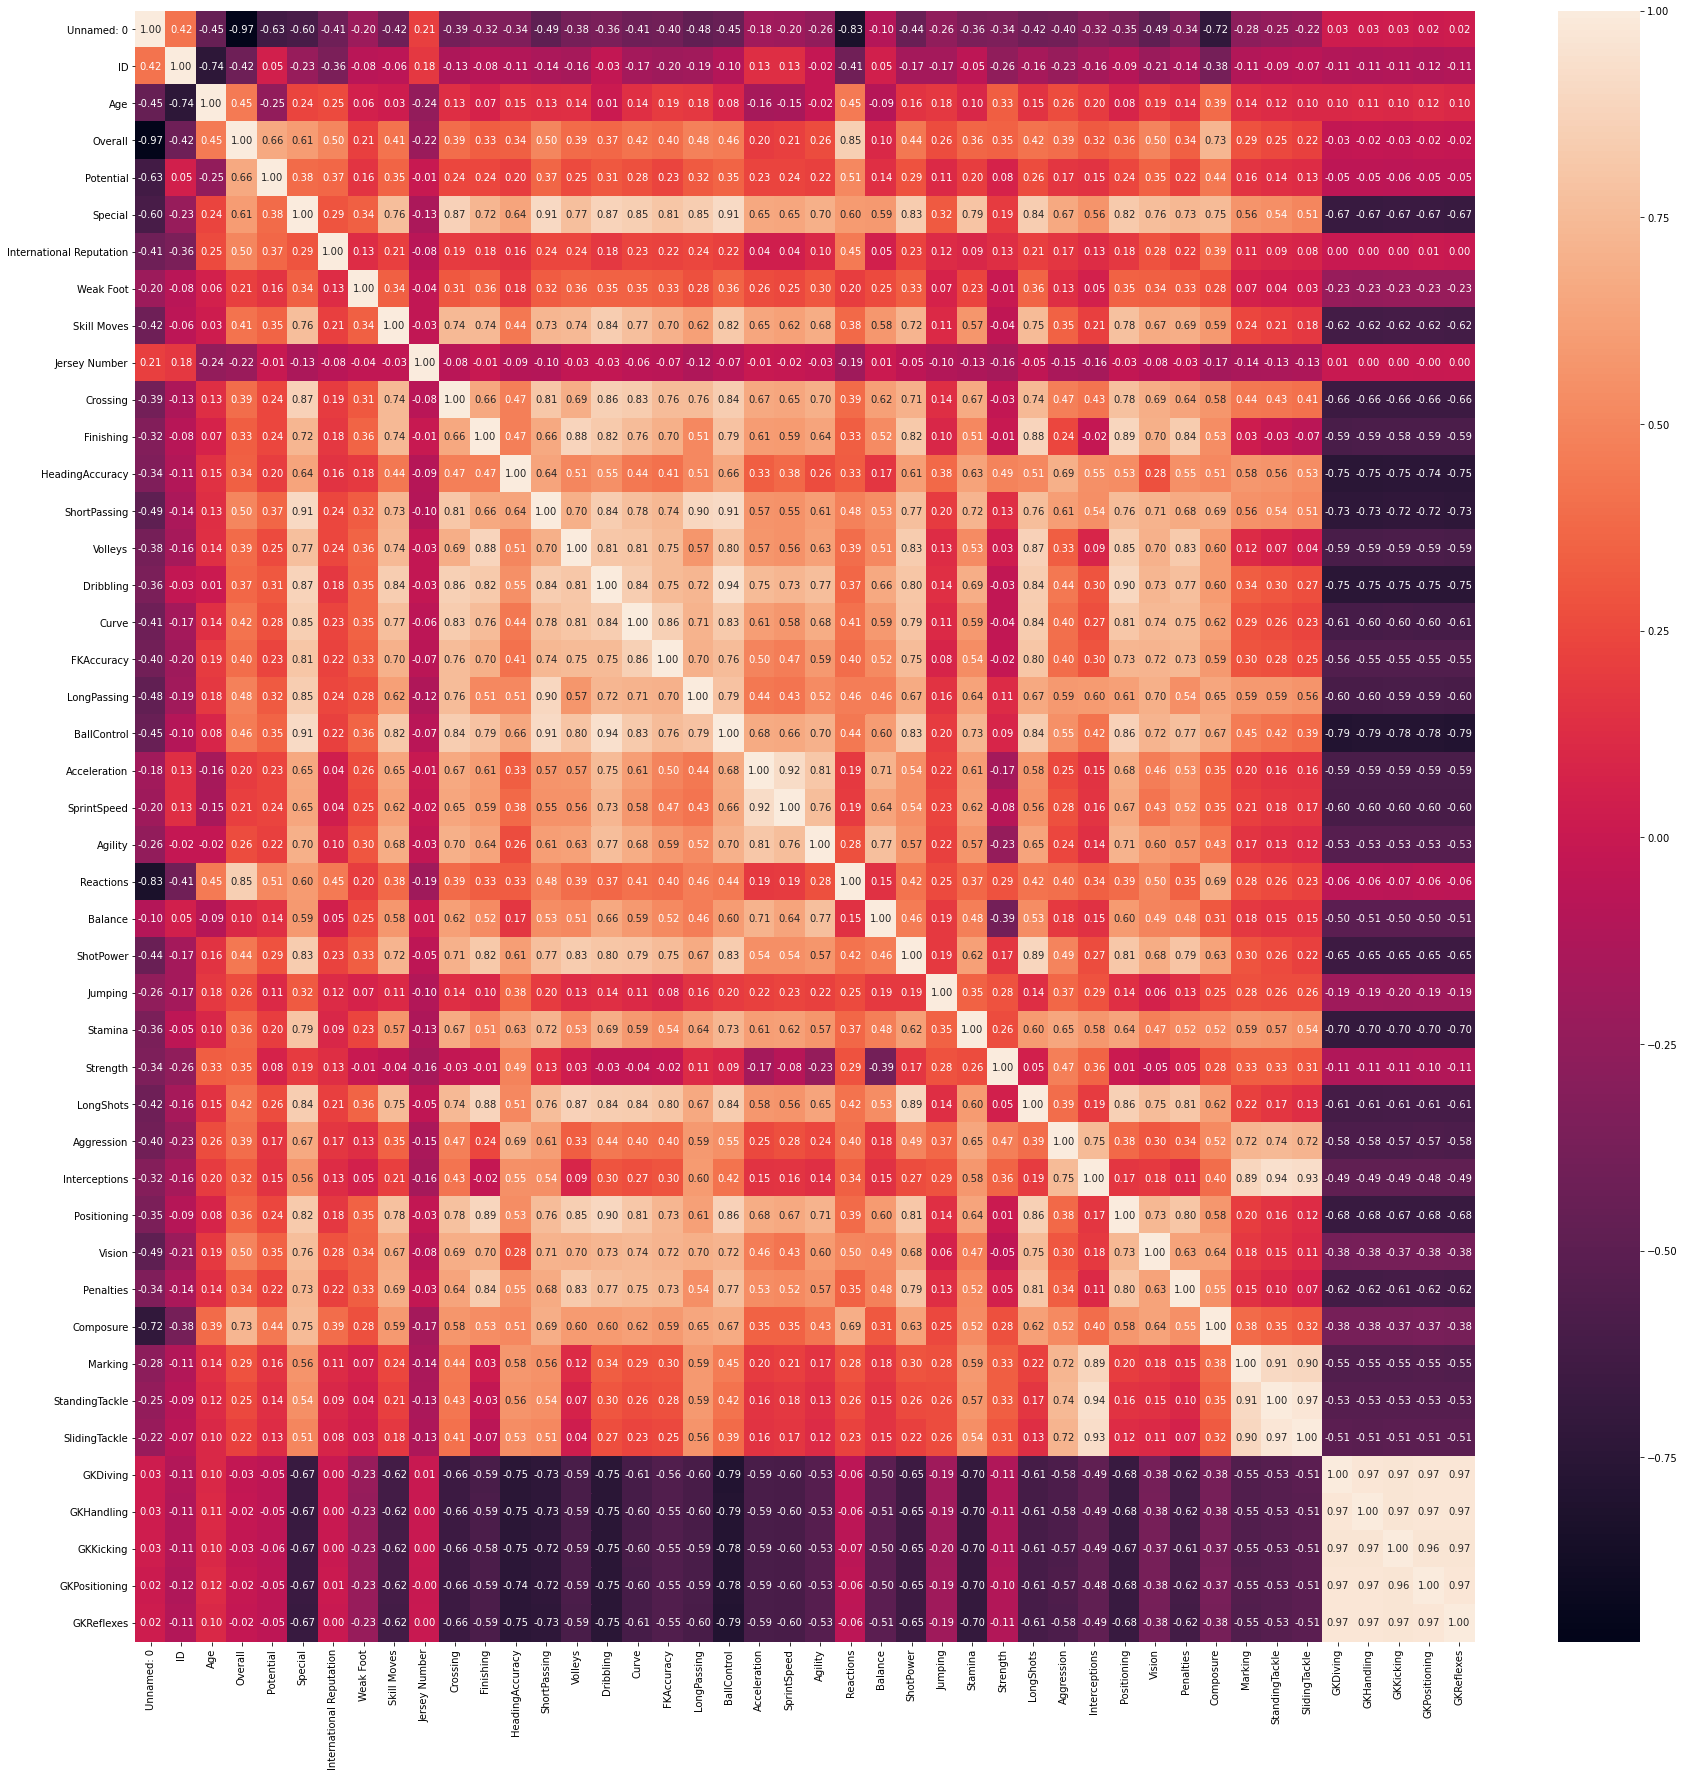

In [228]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(data.corr(), annot=True, fmt=".2f")

Now we see columns that doesn`t correlates with target attribute so we can delete some of them.

Correlation means influence. It mean that the column that correlates (has a large value of the correlation coefficient) with the target attribute will have a strong influence on it. And it matters when we solving the regression problem.

In [232]:
columns_to_drop = ['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
                   'Unnamed: 0', 'Acceleration', 'SprintSpeed', 'Agility', 'Balance',
                   'Marking', 'StandingTackle', 'SlidingTackle', 'Jersey Number']
datac = data.copy()
datac.drop(columns_to_drop, axis='columns', inplace=True)
datac.head()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,...,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure
0,158023,31,94,94,2202,5.0,4.0,4.0,84.0,95.0,...,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0
1,20801,33,94,94,2228,5.0,4.0,5.0,84.0,94.0,...,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0
2,190871,26,92,93,2143,5.0,5.0,5.0,79.0,87.0,...,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0
3,193080,27,91,93,1471,4.0,3.0,1.0,17.0,13.0,...,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0
4,192985,27,91,92,2281,4.0,5.0,4.0,93.0,82.0,...,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0


In [234]:
# also now we see that target attribute correlates the most with next attributes:
most_corr = ['Reactions', 'Composure', 'Potential', 'Special']

**Conducting exploratory data analysis. Plotting the graphs needed to understand the data structure.**

c:\users\viktorb.adft\virtualenv\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\viktorb.adft\virtualenv\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\viktorb.adft\virtualenv\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures 

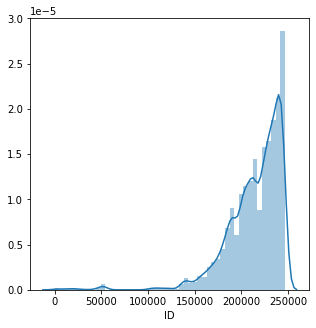

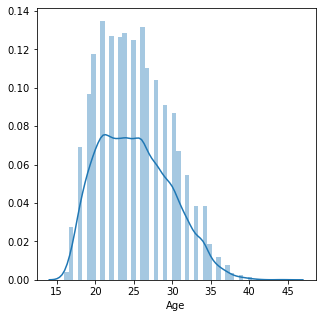

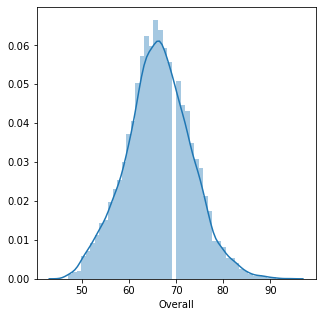

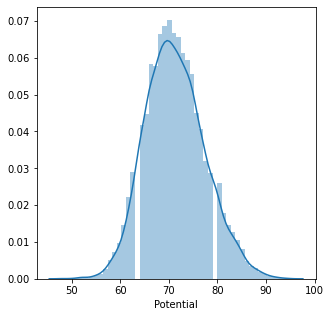

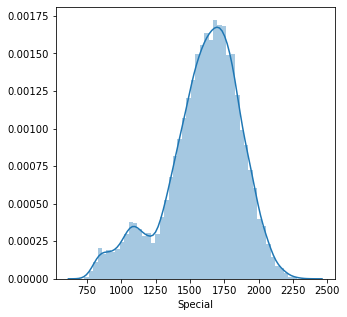

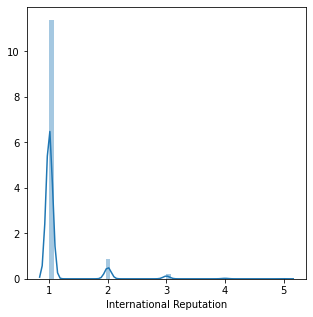

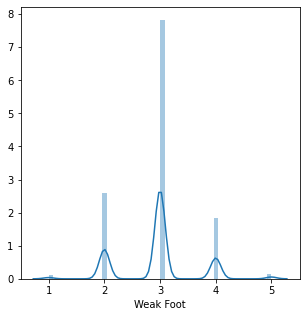

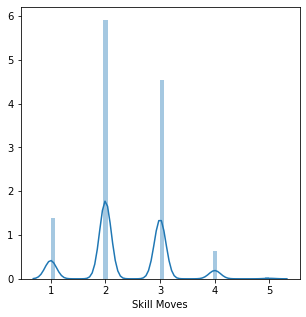

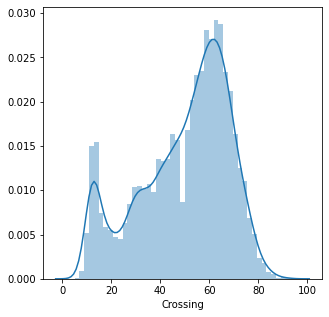

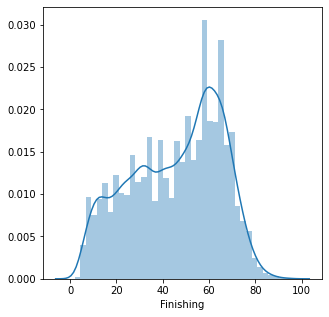

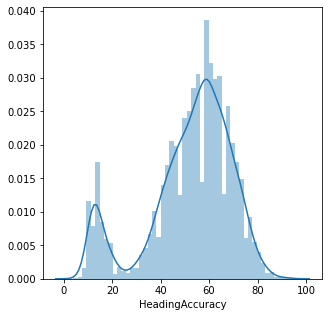

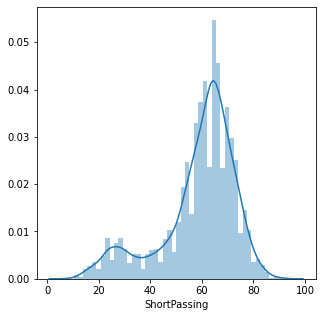

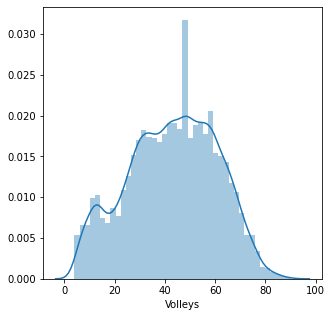

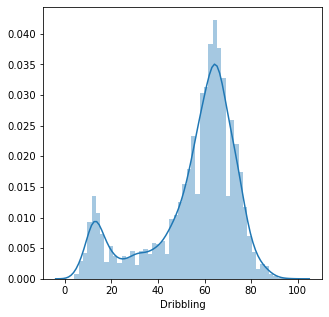

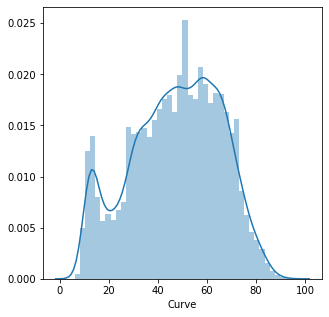

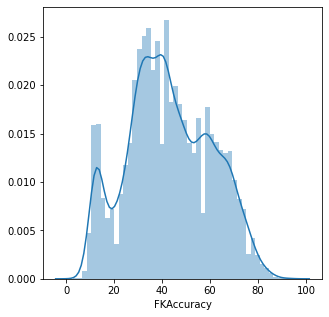

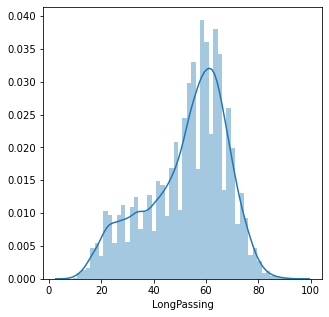

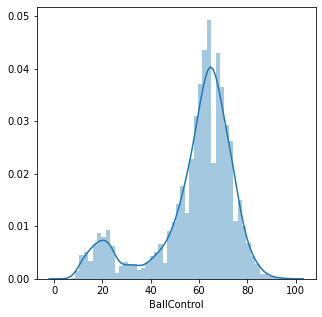

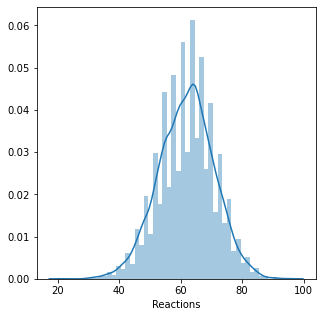

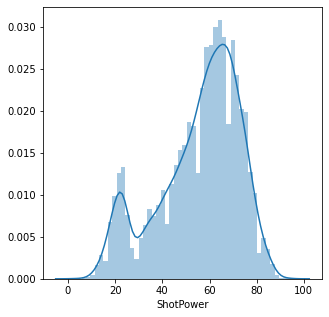

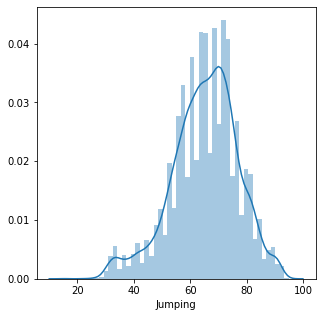

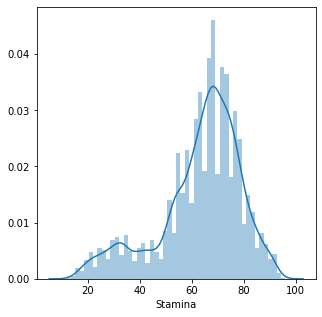

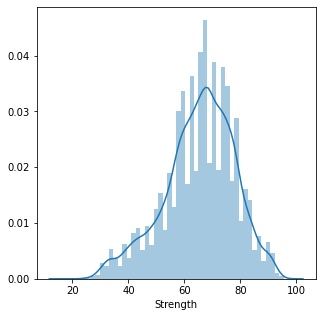

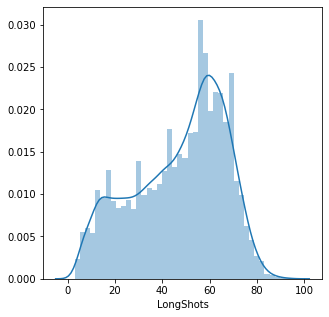

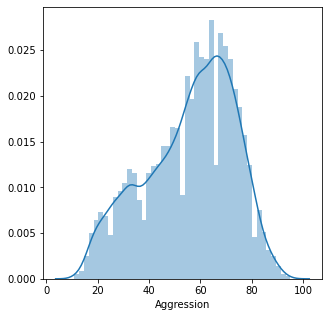

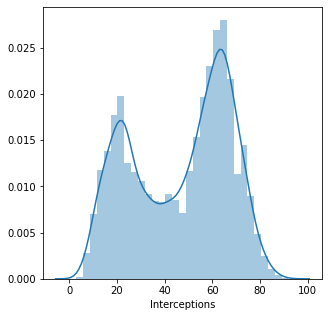

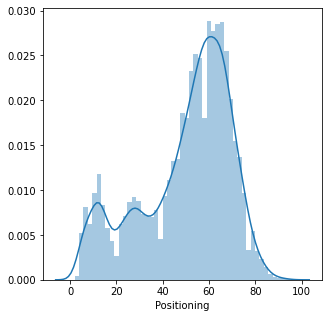

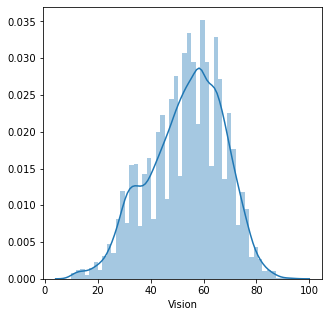

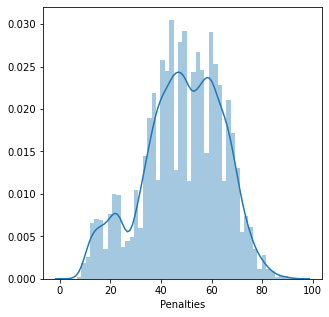

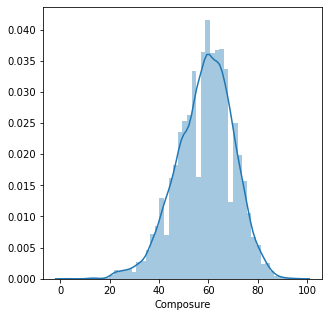

In [233]:
# distribution of attrs
for col in datac.columns:
    fig, ax = plt.subplots(figsize=(5,5))
    sns.distplot(datac[col])

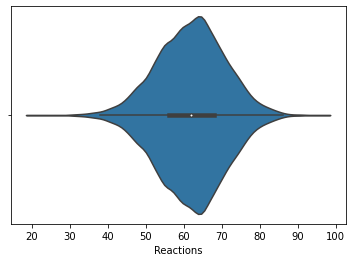

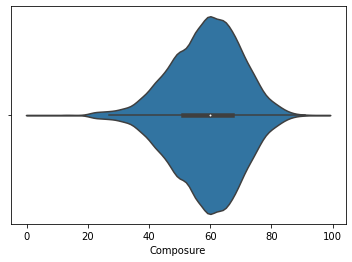

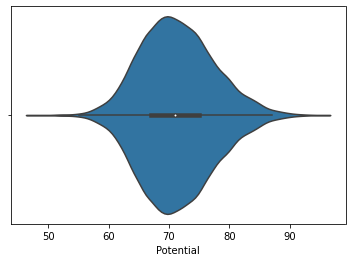

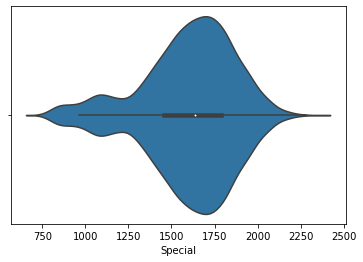

In [236]:
# violin plot for most corr params
for col in most_corr:
    sns.violinplot(x=datac[col])
    plt.show()

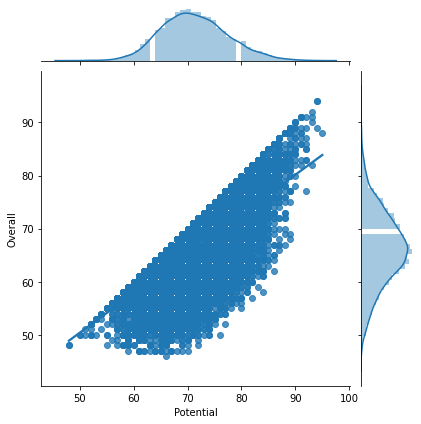

In [162]:
# dependence target attribute Overall of Potential
sns.jointplot(x="Potential", y=target_attr, data=data, kind="reg");

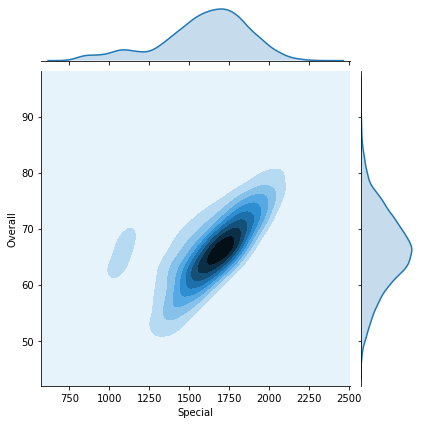

In [238]:
# dependence target attribute Overall of Special
sns.jointplot(x="Special", y=target_attr, data=data, kind="kde");

**Data preparation for model training**

In [239]:
# Split on target_attr as y and most_corr columns as X
X = datac[most_corr]
y = datac[target_attr]

X.head()

,Reactions,Composure,Potential,Special
0,95.0,96.0,94,2202
1,96.0,95.0,94,2228
2,94.0,94.0,93,2143
3,90.0,68.0,93,1471
4,91.0,88.0,92,2281


In [240]:
y.head()

0    94
1    94
2    92
3    91
4    91
Name: Overall, dtype: int64

In [242]:
columns = X.columns
scaler = StandardScaler()
X = scaler.fit_transform(X)
pd.DataFrame(X, columns=columns).describe()

,Reactions,Composure,Potential,Special
count,1.820700e+04,1.820700e+04,1.820700e+04,1.820700e+04
mean,-4.995302e-17,1.498591e-16,6.993423e-16,-1.748356e-16
std,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-4.538432e+00,-4.872788e+00,-3.798249e+00,-3.180037e+00
25%,-6.494538e-01,-6.699829e-01,-7.019345e-01,-5.165847e-01
50%,1.722820e-02,1.180430e-01,-5.007872e-02,1.364381e-01
75%,6.839102e-01,7.309521e-01,6.017770e-01,6.940755e-01
max,3.795093e+00,3.270147e+00,3.861056e+00,2.744861e+00


**Metric Selection**

As metrics we will use the following:

1) mean_absolute_error shows how wrong we are on average

2) median_absolute_error shows how wrong we are in half the dataset

3) r2_score shows the quality of the machine learning model in regression tasks

In [172]:
# func for metrics calculation
def test_model(model):
    print("mean_absolute_error:",
          mean_absolute_error(y_test, model.predict(X_test)))
    print("median_absolute_error:",
          median_absolute_error(y_test, model.predict(X_test)))
    print("r2_score:",
          r2_score(y_test, model.predict(X_test)))

**Forming training and test samples**

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14565, 4)
(3642, 4)
(14565,)
(3642,)


**Building a basic solution**

As machine learning models we will use the following:

1) K nearest neighbors method

2) Decision tree

3) Random forest

**K nearest neighbors method**

In [246]:
# with hyperparameter k=3
knn_3 = KNeighborsRegressor(n_neighbors=3)
knn_3.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [247]:
test_model(knn_3)

mean_absolute_error: 2.035237049240344
median_absolute_error: 1.3333333333333357
r2_score: 0.8313539424192752


**Decision tree**

In [248]:
# with unlimited depth
dt_none = DecisionTreeRegressor(max_depth=None)
dt_none.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [249]:
test_model(dt_none)

mean_absolute_error: 2.5054914881933006
median_absolute_error: 2.0
r2_score: 0.7255805478951515


**Random forest**

In [250]:
# with hyperparameter n=70:
ran_70 = RandomForestRegressor(n_estimators=70)
ran_70.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=70, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [251]:
test_model(ran_70)

mean_absolute_error: 1.8826661175178476
median_absolute_error: 1.3142857142857167
r2_score: 0.8540068796853917


**Selection of hyperparameters**

**K nearest neighbors model**

Will try to find best K hyperparameter for this model

In [252]:
# list of customizable parameters
param_range = np.arange(1, 25, 1)
tuned_parameters = [{'n_neighbors': param_range}]
tuned_parameters

[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24])}]

In [253]:
gs = GridSearchCV(KNeighborsRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=24, p=2,
                    weights='uniform')

We`ll check now graphics for train and test selections

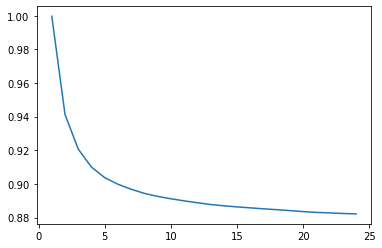

In [254]:
plt.plot(param_range, gs.cv_results_["mean_train_score"])

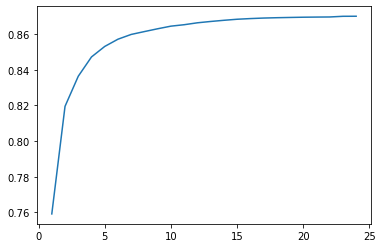

In [255]:
plt.plot(param_range, gs.cv_results_["mean_test_score"])

We have best result with K = 24

In [256]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 1.845769265971078
median_absolute_error: 1.3333333333333286
r2_score: 0.8650133006653038


In [257]:
test_model(knn_3)

mean_absolute_error: 2.035237049240344
median_absolute_error: 1.3333333333333357
r2_score: 0.8313539424192752


We see now that model with optimal hyperparameter better than our first baseline model for K nearest neighbors model

**Decision tree**

Will try to found best hyperparameter "depth of the decision tree"

In [258]:
# list of customizable parameters
param_range = np.arange(1, 25, 1)
tuned_parameters = [{'max_depth': param_range}]
tuned_parameters

[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20, 21, 22, 23, 24])}]

In [259]:
gs = GridSearchCV(DecisionTreeRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

We`ll check now graphics for train and test selections

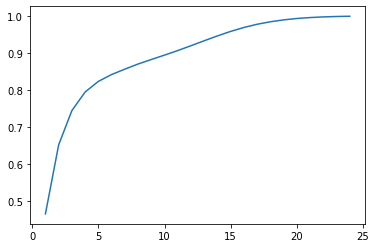

In [260]:
plt.plot(param_range, gs.cv_results_["mean_train_score"])

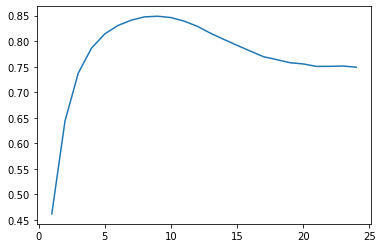

In [261]:
plt.plot(param_range, gs.cv_results_["mean_test_score"])

We have best result with "depth of the decision tree" = 9

In [262]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 1.966545426104523
median_absolute_error: 1.4226202207331475
r2_score: 0.8449414092575913


In [263]:
test_model(dt_none)

mean_absolute_error: 2.5054914881933006
median_absolute_error: 2.0
r2_score: 0.7255805478951515


We see now that model with optimal hyperparameter better than our first baseline model for Decision tree model

**Random forest**

Will try to found best hyperparameter n

In [264]:
# list of customizable parameters
param_range = np.arange(30, 300, 30)
tuned_parameters = [{'n_estimators': param_range}]
tuned_parameters

[{'n_estimators': array([ 30,  60,  90, 120, 150, 180, 210, 240, 270])}]

In [265]:
gs = GridSearchCV(RandomForestRegressor(), tuned_parameters,
                  cv=ShuffleSplit(n_splits=10), scoring="r2",
                  return_train_score=True, n_jobs=-1)
gs.fit(X, y)
gs.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=240, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

We`ll check now graphics for train and test selections

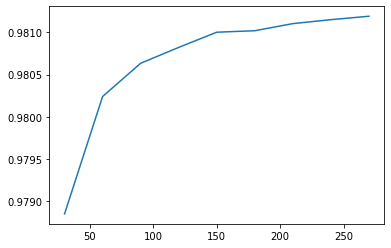

In [266]:
plt.plot(param_range, gs.cv_results_["mean_train_score"])

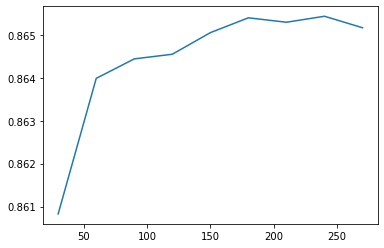

In [267]:
plt.plot(param_range, gs.cv_results_["mean_test_score"])

We have best result with n = 240

In [268]:
reg = gs.best_estimator_
reg.fit(X_train, y_train)
test_model(reg)

mean_absolute_error: 1.8716266545287343
median_absolute_error: 1.3083333333333336
r2_score: 0.8560122565060393


In [269]:
test_model(ran_70)

mean_absolute_error: 1.8826661175178476
median_absolute_error: 1.3142857142857167
r2_score: 0.8540068796853917


We see now that model with optimal hyperparameter better than our first baseline model for Random forest model

**CONCLUSION: we built 3 models with next optimal hyperparameters:**

1) K nearest neighbors 0.865

2) Decision tree 0.8449

3) Random forest 0.856

And as we can see, the results are not very different

But still the best model for regression task with current dataset is **K nearest neighbors**